algoritm: k-means

In [105]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
import random

In [2]:
X=np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])

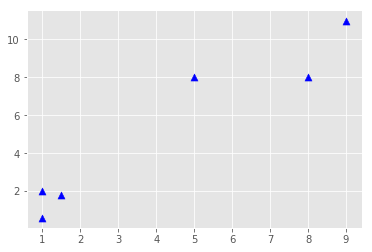

In [3]:
plt.scatter(X[:,0],X[:,1],c='b',marker='^',s=50)

In [4]:
clf = KMeans(n_clusters=2)

In [5]:
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

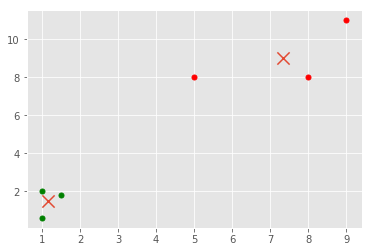

In [6]:
centroids=clf.cluster_centers_
labels=clf.labels_
colors = ['g.','r.','c.','b.','k.','o.']
for i in range(len(X)):
    plt.plot(X[i][0],X[i][1], colors[labels[i]], markersize=10)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=150)

In [7]:
print(labels,'\n\n',centroids)

[0 0 1 1 0 1] 

 [[1.16666667 1.46666667]
 [7.33333333 9.        ]]


In [8]:
from sklearn import preprocessing, model_selection
import pandas as pd

https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls

In [9]:
df = pd.read_excel('https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls')

In [10]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [11]:
df.drop(['body','name'],1,inplace=True)
df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)
df.head()

c:\users\shen\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"


In [12]:
set(df['sex'].head().tolist())

{'female', 'male'}

In [13]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
    return df

In [14]:
df = handle_non_numerical_data(df)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,1,29.0000,0,0,765,211.3375,147,3,1,188
1,1,1,0,0.9167,1,2,508,151.5500,148,3,18,236
2,1,0,1,2.0000,1,2,508,151.5500,148,3,0,236
3,1,0,0,30.0000,1,2,508,151.5500,148,3,0,236
4,1,0,1,25.0000,1,2,508,151.5500,148,3,0,236


In [15]:
tgv={'a':1,'b':2,'c':3}
def cti(a):
    return tgv[a]
list(map(cti, ['a','b','b','c']))
# map() function returns a list of the results after applying the 
# given function to each item of a given iterable (list, tuple etc.)

[1, 2, 2, 3]

In [16]:
X = np.array(df.drop(['survived'],1).astype(float))
X = preprocessing.scale(X)

In [17]:
y=np.array(df['survived'])

In [18]:
clf = KMeans(2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct+=1
print(correct/len(X))
print(sum(clf.predict(X)==y)/len(X))



0.7440794499618029
0.7440794499618029


## using svm to predict

In [20]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X,y)
sum(clf.predict(X)==y)/len(X)

0.9503437738731857

## cunstom k mean algorithm

<function matplotlib.pyplot.show>

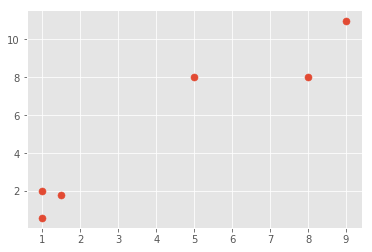

In [21]:
X=np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])
colors = ['g','r','c','b','k']
plt.scatter(X[:,0],X[:,1],s=50)
plt.show

In [22]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i]= []
            for featureset in X:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100)>self.tol:
                    optimized = Flase
                
                if optimized:
                    break
                
    def predict(self, data):
        distances = [np.lialg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
                

In [23]:
clf = K_Means()
clf.fit(X)

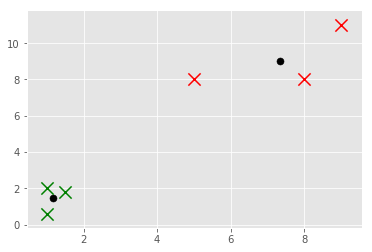

In [24]:
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker='o', color='k', s=50)
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color=color, s=150)

## Mean Shift
hierarchical clustering

In [25]:
from sklearn.cluster import MeanShift
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs

In [26]:
centers=[[1,1,1],[5,5,5],[3,10,10]]
X, _ =make_blobs(n_samples = 1000, centers = centers, cluster_std = 1)

In [27]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print('Number of estimated cluster:', n_clusters_)

[[ 1.07031725  0.98376935  1.00181896]
 [ 2.96562999 10.02005647  9.86783823]
 [ 4.95668142  4.96337127  4.93946733]]
Number of estimated cluster: 3


<IPython.core.display.Javascript object>


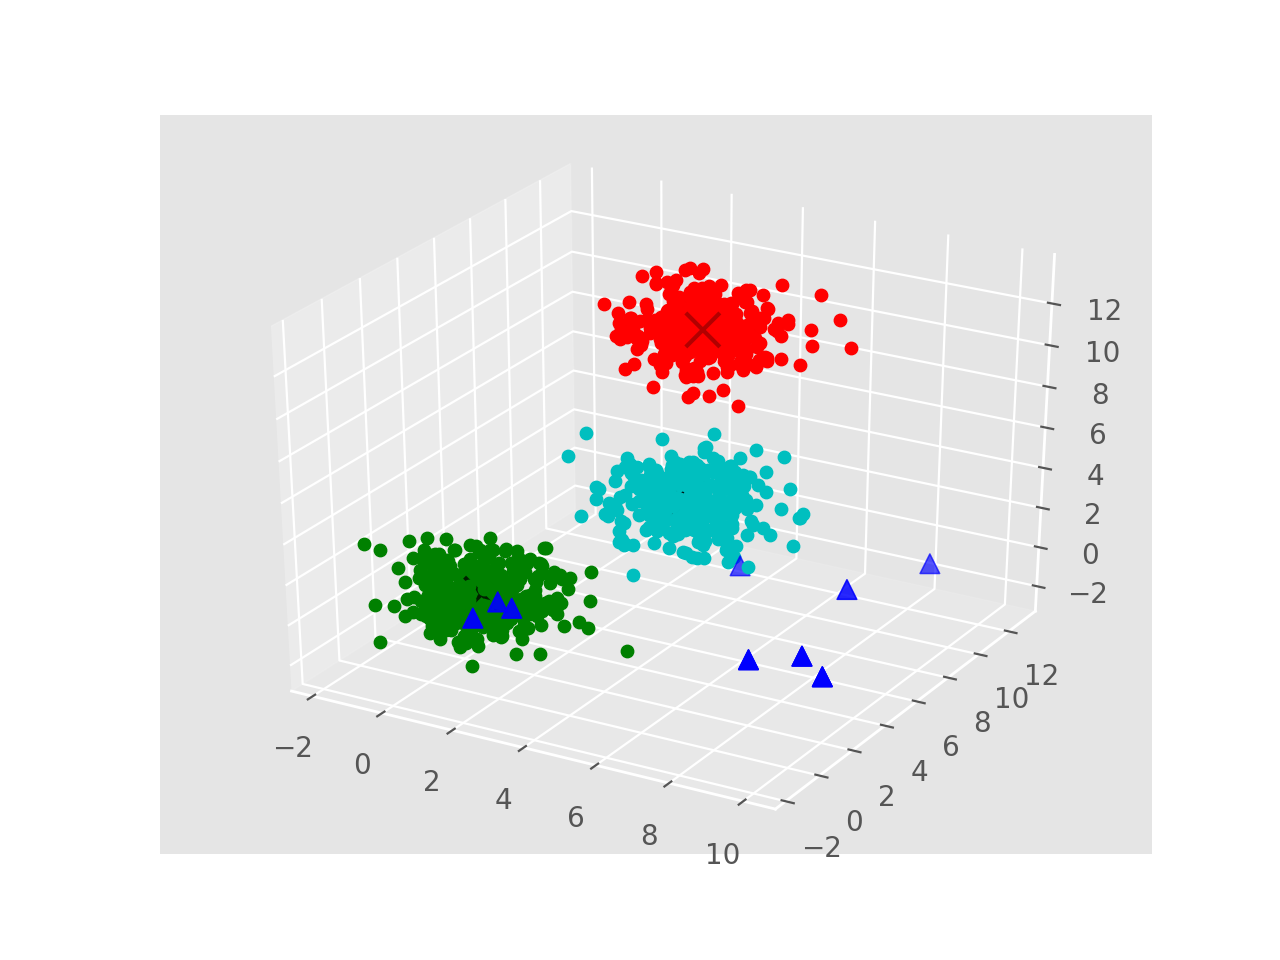

In [28]:
%matplotlib notebook
colors = ['g','r','c','b','k']
fig = plt.figure()
ax=fig.add_subplot(111, projection = '3d')

for i in range(len(X)):
    ax.scatter(X[i][0],X[i][1],X[i][2], c=colors[labels[i]], marker='o')
    

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
           marker = 'x', color = 'k', s = 150)

plt.show()

In [36]:
df = pd.read_excel('https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls')
original_df = pd.DataFrame.copy(df)
df.drop(['body','name'],1,inplace=True)
df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)

c:\users\shen\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [37]:
df = handle_non_numerical_data(df)
df.drop(['ticket', 'home.dest'], 1, inplace=True)
X = np.array(df.drop(['survived'],1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)
labels = clf.labels_
cluster_centers = clf.cluster_centers_
original_df['cluster_group'] = np.nan

In [38]:
for i in range(len(X)):
    original_df['cluster_group'].iloc[i]=labels[i]

n_clusters_ = len(np.unique(labels))
survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i))]
    survival_cluster = temp_df[(temp_df['survived']==1)]
    survival_rate = len(survival_cluster)/len(temp_df)
    survival_rates[i] = survival_rate
    
print(survival_rates)

c:\users\shen\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


{0: 0.3723577235772358, 1: 0.6111111111111112, 2: 1.0, 3: 0.36363636363636365, 4: 0.1}


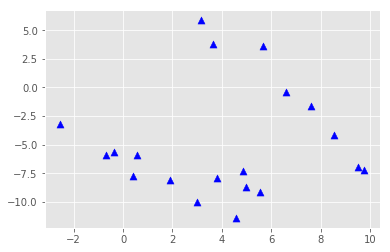

In [132]:
%matplotlib inline
colors = 10* ['g','r','c','b','y']
#X=np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11],[8,2],[10,2],[9,3]])
centers = random.randrange(2,8)
X, y = make_blobs(n_samples = 20, centers = centers, n_features = 2)
plt.scatter(X[:,0],X[:,1],c='b',marker='^',s=50)
plt.show()


In [137]:
class Mean_Shift:
    def __init__(self, radius=None, radius_norm_step = 100):
        self.radius_norm_step = radius_norm_step
        self.radius = radius
# self is instance, a = someclass , a is self

    def fit(self, data):
        if self.radius == None:
            all_data_centroid = np.average(data, axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm / self.radius_norm_step
        
        centroids = {}
        for i in range(len(data)):
            centroids[i] = data[i]
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                weights = [i for i in range(self.radius_norm_step)][::-1]
                
                for featureset in data:
                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.00000000001
                    weight_index = int(distance/ self.radius)
                    if weight_index > self.radius_norm_step-1:
                        weight_index = self.radius_norm_step-1
                    to_add = (weights[weight_index]**2)*[featureset]
                    in_bandwidth += to_add
#                     if np.linalg.norm(featureset-centroid) < self.radius:
#                         in_bandwidth.append(featureset)
                
                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))
                
            uniques = sorted(list(set(new_centroids)))
            
            to_pop = []
            for i in uniques:
                for ii in uniques:
                    if i==ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii))<=self.radius:
                        to_pop.append(ii)
                        break
            
            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass
            
            prev_centroids = dict(centroids)
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
            
            optimized = True
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
            if not optimized:
                break

        self.centroids = centroids
        self.classifications = {}
        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            self.classifications[classification].append(featureset)
    def predict(self, data):
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centorid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        
    

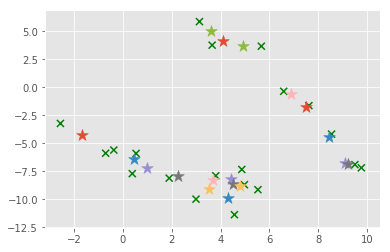

In [138]:
clf = Mean_Shift()
clf.fit(X)
centroids = clf.centroids
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color=colors, s=50, linewidths= 5)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], marker='*', s=150)
    
plt.show()

In [139]:
clf.radius

0.06334772663983826